データの作成

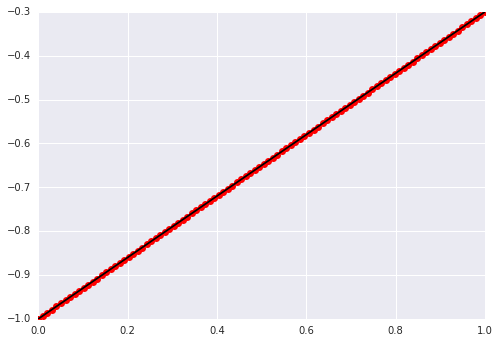

In [1]:
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


b_train = -1
w_train = 0.7
x_train = np.linspace(0, 1.0, 100)
y_train = x_train * w_train + b_train

plt.figure(1)
plt.plot(x_train, y_train, 'ro', label='Data')
plt.plot(x_train, y_train, 'k-', label='Line')
plt.show()

wとbをTensorFlowを用いて、導き出す。

In [2]:
# GraphのReset(TF関連処理の一番最初に呼び出す)
tf.reset_default_graph()

# 変数の定義
x = tf.placeholder(tf.float32, name="input")
y = tf.placeholder(tf.float32, name="output")
w = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# 線形回帰のモデル
y_pred = tf.add(tf.multiply(x, w), b)

# 損失関数
loss = tf.reduce_mean(tf.pow(y_pred - y, 2))

# Optimizer
# 勾配降下法
learning_rate = 0.1
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Data保存先
LOGDIR = './data'

# セッション  
with tf.Session() as sess:
  # 変数の初期化
  init_op = tf.global_variables_initializer()
  sess.run(init_op)
  
  # Summary
  summary_writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    
  # Graph
  with tf.Graph().as_default() as graph:
  
    # トレーニング回数
    training_step = 1500
    validation_step = 100

    #トレーニング
    for step in range(training_step):
      sess.run(train_op, feed_dict={x:x_train, y:y_train})

      # 途中経過表示
      if step % validation_step == 0:
        loss_output = sess.run(loss, feed_dict={x:x_train, y:y_train})
        w_output = sess.run(w)
        b_output = sess.run(b)
        print "Step %i, cost %f, weight %f, bias %f" % (step, loss_output, w_output, b_output)

  summary_writer.flush()

Step 0, cost 0.437419, weight -0.875578, bias 0.263572
Step 100, cost 0.017763, weight 0.246335, bias -0.756865
Step 200, cost 0.001194, weight 0.582400, bias -0.936974
Step 300, cost 0.000080, weight 0.669515, bias -0.983662
Step 400, cost 0.000005, weight 0.692098, bias -0.995765
Step 500, cost 0.000000, weight 0.697952, bias -0.998902
Step 600, cost 0.000000, weight 0.699469, bias -0.999715
Step 700, cost 0.000000, weight 0.699862, bias -0.999926
Step 800, cost 0.000000, weight 0.699964, bias -0.999981
Step 900, cost 0.000000, weight 0.699990, bias -0.999995
Step 1000, cost 0.000000, weight 0.699997, bias -0.999999
Step 1100, cost 0.000000, weight 0.699997, bias -0.999999
Step 1200, cost 0.000000, weight 0.699997, bias -0.999999
Step 1300, cost 0.000000, weight 0.699997, bias -0.999999
Step 1400, cost 0.000000, weight 0.699997, bias -0.999999


In [ ]:
!tensorboard --logdir=data/

Starting TensorBoard 41 on port 6006
(You can navigate to http://172.17.0.2:6006)
